In [1]:
"""
Entrenar un modelo usando Spark y Numba CUDA
"""
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("SOFM").config("spark.executor.memory", "4gb").config('spark.driver.cores', '8').getOrCreate()
sc = spark.sparkContext

In [2]:
import som
import numpy as np
import math
import time

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
    
faces = fetch_olivetti_faces()['data']
rows = 20
cols = 20
d=faces.shape[1]
rdd = sc.parallelize(faces)

In [5]:
inicio = time.time()
weights=som.spark_gpu_batch_som(rdd, d, 5, rows, cols, seed=3)
fin = time.time()
print (fin - inicio)

42.29185891151428


In [6]:
weights

array([ 0.29329082,  0.30480313,  0.31752217, ...,  0.20769058,
        0.21167645,  0.21421178], dtype=float32)

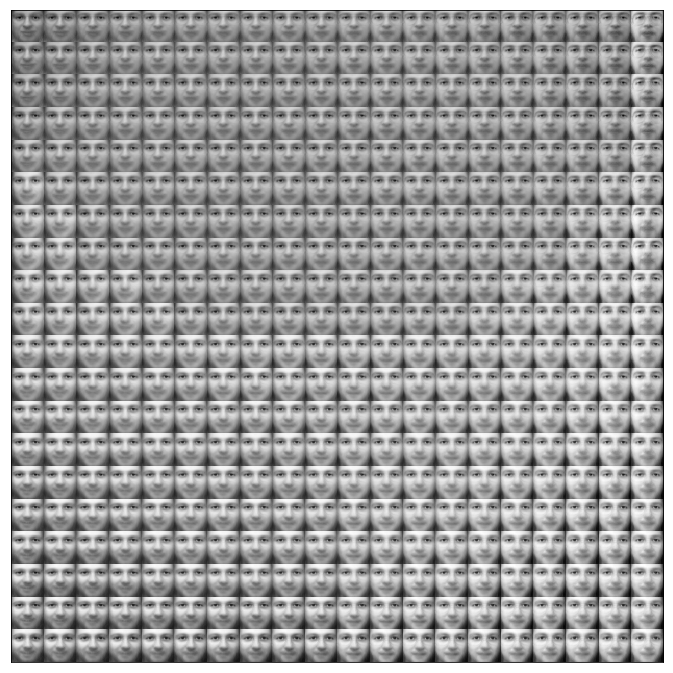

In [7]:
import numpy as np
W = weights.reshape((rows, cols, d))
pattern_length = faces.shape[1]
pattern_width = pattern_height = int(np.sqrt(pattern_length))
matrix_side = 20
matrix_w = np.empty((matrix_side * pattern_height, matrix_side * pattern_width))
matrix_w *= 255


for i in range(matrix_side):
    for j in range(matrix_side):
        matrix_w[i * pattern_height:i * pattern_height + pattern_height, 
j * pattern_height:j * pattern_height + pattern_width] = W[i, j].reshape((pattern_height, pattern_width)) * 255.0
fig, ax = plt.subplots(figsize=(12,12))

ax.matshow(matrix_w.tolist(), cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [8]:
inicio = time.time()
weights=som.spark_cpu_batch_som(rdd, d, 5, rows, cols)
fin = time.time()
print(fin - inicio)

44.486793994903564


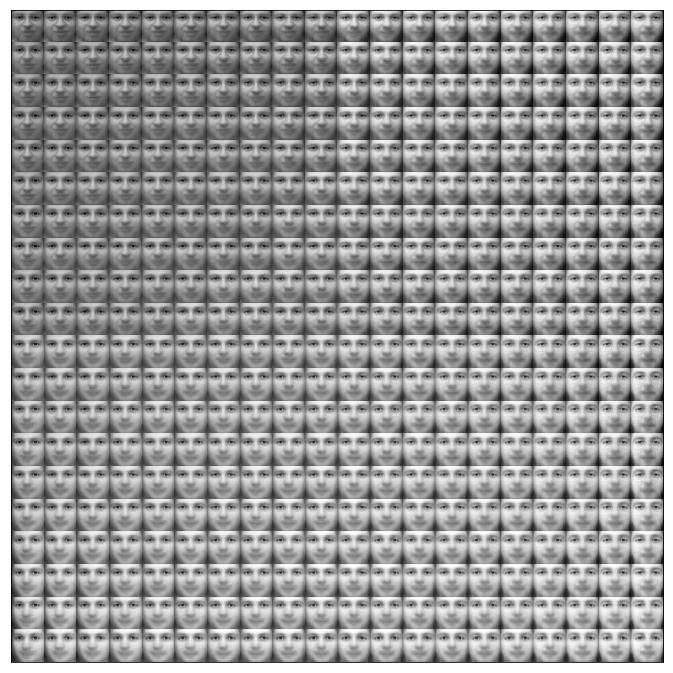

In [9]:
W = weights.reshape((rows, cols, d))
pattern_length = faces.shape[1]
pattern_width = pattern_height = int(np.sqrt(pattern_length))
matrix_side = 20
matrix_w = np.empty((matrix_side * pattern_height, matrix_side * pattern_width))
matrix_w *= 255


for i in range(matrix_side):
    for j in range(matrix_side):
        matrix_w[i * pattern_height:i * pattern_height + pattern_height, 
j * pattern_height:j * pattern_height + pattern_width] = W[i, j].reshape((pattern_height, pattern_width)) * 255.0
fig, ax = plt.subplots(figsize=(12,12))

ax.matshow(matrix_w.tolist(), cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [10]:
"""
Ahora probamos con SUSY
"""

rdd2 = sc.textFile('../datasets/SUSY.csv')
# 2. Separamos y ponemos la etiqueta al final en vez de al principio

rdd2 = rdd2.map(lambda line: line.split(','))
rdd2 = rdd2.map(lambda line: line[1:])


In [14]:
d = len(rdd2.take(1)[0])
rows = 8
cols = 7
inicio = time.time()
weights=som.spark_gpu_batch_som(rdd2, d, 1, rows, cols, sigma_0=5, tau=10, seed=3)
fin = time.time()
print(fin - inicio)

61.89230155944824


In [12]:
inicio = time.time()
cpu_weights=som.spark_cpu_batch_som(rdd2, d, 1, rows, cols, sigma_0=5, tau=10, seed=3)
fin = time.time()
print(fin - inicio)

348.825031042099


In [13]:
inicio = time.time()
weights=som.spark_gpu_batch_sommy_red(rdd2, d, 1, rows, cols, sigma_0=5, tau=10, seed=3)
fin = time.time()
print(fin - inicio)

1237.077439546585


In [8]:
d

18

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

MapPartitionsRDD[26] at coalesce at NativeMethodAccessorImpl.java:0

[array([ 1.72738767,  0.35947609, -1.41376185,  0.87467331,  1.08538175,
        -0.01554996,  0.80184031,  0.41932723,  0.84314036, -0.48791629,
         1.26057243,  1.34809637,  0.94900596,  1.03827012,  1.20368624,
         1.01730514,  0.07231497,  0.426054  ], dtype=float32),
 array([ 0.5847193 , -1.11603975,  1.31583405,  0.96880364,  0.47623944,
        -1.07241046,  1.0926038 , -0.11600323,  1.64013314, -0.68121618,
         0.90350187,  1.0998565 ,  1.08024728,  2.00126767,  0.96516967,
         1.55858266,  1.30764675,  0.0881521 ], dtype=float32),
 array([ 0.41563046, -0.0080567 ,  0.21467057,  0.60077685, -1.10758114,
         1.09528732,  0.51826453, -0.77964872,  0.77797896, -0.11094733,
         0.49721408,  0.63186932,  1.12771583,  1.24678206,  0.49693313,
         0.929501  ,  0.85384291,  0.0641106 ], dtype=float32),
 array([  4.63717133e-01,  -6.49664849e-02,  -1.34988785e+00,
          7.33655632e-01,   9.12584073e-04,   4.21586961e-01,
          6.60731971e-01,  